## gensim 패키지에서 제공하는 이미 구현된 Word2Vec사용
- 이미 구현된 Word2Vec을 사용하여 영어와 한국어 데이터로 학습한 모델 생성 
- 영어 데이터로 학습한 Word2Vec 모델 생성
  - 영어로 된 코퍼스를 다운받아 전처리 수행하고
  - 전처리한 데이터로 Word2Vec 작업 진행
- 한국어 데이터로 학습한 Word2Vec 모델 생성

### 영어 Word2Vec

- ted_en-20160408.xml
    - 학술강의 ted 영상 자막 파일
- 학습 데이터 파일은 xml 파일로 내용을 추출하기 위해서는 전처리 필요  
- 실제 데이터는 영어문장으로만 구성된 내용을 담고 있는 \<content>와 \</content> 사이의 내용  
- **영문 전처리 작업**을 통해 xml 태그 제거, 해당 데이터만 추출  
- \<content>와 \</content> 사이의 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 제거 

In [1]:
# 데이터 다운로드
# import urllib.request
# urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", 
#                            filename="./data/ted_en-20160408.xml")

##### 전처리 수행

In [2]:
from lxml import etree
targetXML = open('./data/ted_en-20160408.xml', 'r', encoding='utf8')
target_text = etree.parse(targetXML)
target_text

- \<content>와 \</content> 사이 내용이 강의 영상 자막

In [3]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 추출
parse_text = '\n'.join(target_text.xpath('//content/text()'))
# parse_text

In [4]:
import re
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)
# content_text

- NLTK(Natural Language Toolkit) 패키지
    - 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
    - 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

- 말뭉치(corpus)
    - 평소 쓰는 말이나 글을 컴퓨터가 읽을 수 있는 형태로 모아 놓은 언어 집합 자료
    - ex. 연설문, 자막 등
- sent_tokenize   
    - 코퍼스(말뭉치)를 문장 단위로 구분하는 작업
    - 텍스트를 문장 단위로 구분할 때에는 기본적으로 온점(.), 물음표(?), 느낌표(!) 등을 기준으로 함

In [6]:
# 문장 토큰화 - 한개 문장으로 되어 있는 자막을 여러 문장으로 분리()
from nltk.tokenize import  sent_tokenize
sent_text = sent_tokenize(content_text)
# sent_text

In [7]:
# 단어 토큰화
from nltk.tokenize import word_tokenize

# 각 문장에 대해서 구두점(특수문자)을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower()) # 정규식 적용전에 소문자로 변환 후 정규식 적용
     normalized_text.append(tokens)

In [8]:
normalized_text[:2]

['here are two reasons companies fail they only do more of the same or they only do what s new ',
 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ']

In [9]:
print(word_tokenize(normalized_text[0]))

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']


In [10]:
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]
# result
result[:2]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation']]

In [11]:
print('총 샘플의 개수 :', len(result))

총 샘플의 개수 : 273424


In [12]:
print(result[:3])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']]


In [13]:
# 데이터 셋 준비 완료 : result 

### Word2Vec 학습시키기

* vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
* window = 슬라이딩 윈도우 크기(학습 시 앞 뒤로 고려하는 단어의 개수)
* min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 모델 학습에서 제외)
* workers = 학습을 위한 thread 수 (갯수 많아질수록 CPU 사용양 증가)
* sg = 0은 CBOW, 1은 Skip-gram.

- 참고
    - process : 애플리케이션
    - thread : process를 나눈 작업 단위 
        - 하나의 process 안에서 여러 개의 thread 실행 
        - 즉, 하나의 애플리케이션 안에서 여러 작업을 수행 
        - 예 : MS Word 작성 중에 프린트 작업 동시 수행 

#### 전처리 한 데이터로 학습한 Word2Vec 모델 생성 
- model.wv.most_similar : 입력한 단어에 대해서 가장 유사한 단어들 출력

In [14]:
from gensim.models import Word2Vec

# result 데이터로 학습한 Word2Vec 모델 생성
model =Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [15]:
from gensim.models import KeyedVectors

# 임베딩 벡터 크기 
model.wv.vectors.shape

(21613, 100)

In [16]:
# 첫 번째 벡터값
model.wv.vectors[0]

array([-0.32126936, -0.8379525 , -0.49370328, -0.41448504, -0.784105  ,
       -1.3961483 , -0.87278277, -0.56586677,  0.4887728 , -0.1963231 ,
        1.1586473 , -0.6558315 , -0.45736533,  0.289653  ,  0.1872802 ,
        0.35958442, -0.88714707,  0.17965597, -1.7494321 , -1.6878523 ,
        0.32734737,  0.7914089 ,  0.19917493, -1.4538125 ,  0.26366687,
       -2.9746225 ,  0.91710705,  0.8980315 ,  0.8748556 ,  0.67485166,
        0.2889969 , -0.98733747,  0.6887749 , -1.1602652 ,  0.22785473,
        0.14198495, -0.59381324, -1.7474636 , -0.67086923,  0.75127876,
       -0.3176174 , -0.0509603 , -1.8860911 , -2.1693087 ,  0.38436437,
       -0.24083403, -0.36267534,  1.1920233 ,  0.6389837 , -1.1740029 ,
       -0.11998031,  0.9866936 ,  0.33798113,  0.40708426, -1.1879388 ,
       -0.05269289, -0.03354367,  0.01011594, -0.506834  , -0.769926  ,
       -0.35046887,  0.84955245, -0.24566174, -0.9492403 ,  0.16794159,
       -1.5871403 , -0.7268916 ,  0.63628864,  0.7940022 , -1.12

In [17]:
# 학습된 모델을 사용해서 유사한 단어 검색
model.wv["men"]

array([ 0.87748396, -2.8402574 ,  0.7184515 , -0.71302253,  0.06120594,
       -1.3750126 , -1.7446278 ,  1.298628  , -0.7180557 ,  0.81273884,
       -1.5748179 , -1.1742057 , -0.97198904,  1.5908384 ,  0.52059954,
        0.4207189 , -1.3481543 , -0.16391823,  1.3039494 ,  1.8864064 ,
       -0.538291  ,  1.2390363 , -1.0176691 , -1.3895437 ,  0.7395882 ,
        0.7314563 , -2.7641833 ,  1.2819433 ,  0.14760229, -0.36807957,
        0.53241926,  0.85370195, -0.03814032,  1.6770272 , -0.9547472 ,
       -1.354426  , -1.9624599 , -2.134512  , -0.6661268 , -0.77259386,
        0.5491771 , -0.62182325, -1.4258237 ,  2.7845032 ,  0.18309127,
        1.6583098 , -1.2248151 , -1.4696999 ,  0.35204935, -1.8278939 ,
       -0.39932424, -0.03031986, -0.31708795,  0.22574405, -1.8078502 ,
       -0.79834634,  0.38711318, -0.5552314 , -0.13438976,  0.02089294,
        0.47714883, -0.6293337 , -0.51639456,  0.03554067, -0.06831847,
        1.6412092 , -0.9777446 , -1.5739189 ,  0.8997365 , -1.05

In [19]:
# 학습된 모델을 사용해서 유사 단어 검색 -vocabulary 없는 단어 오류 발생
# model.wv.most_similar("남자") # 에러 : KeyError: "Key '남자' not present in vocabulary"
model.wv.most_similar("men")

[('women', 0.903396487236023),
 ('girls', 0.7930805087089539),
 ('boys', 0.7195970416069031),
 ('adults', 0.6982879638671875),
 ('children', 0.6979811191558838),
 ('africans', 0.6930416226387024),
 ('individuals', 0.6924079060554504),
 ('babies', 0.6887937784194946),
 ('soldiers', 0.6864857077598572),
 ('americans', 0.6736237406730652)]

#### Word2Vec 모델 저장하고 로드

In [20]:
from gensim.models import KeyedVectors # word2vec model load class
model.wv.save_word2vec_format("./model/eng_w2v_model") # 확장자 필요없음
loaded_model = KeyedVectors.load_word2vec_format("./model/eng_w2v_model")

### Word2Vec method
- most_similar : 유사한 단어 반환
- wv.similarity : 유사도 반환
- doesnt_match : 가장 거리가 먼 단어
- distance() : 거리 반환 
- n_similarity() : 단어 집한 간의 유사도 계산 가능

In [21]:
loaded_model.most_similar("men") # 해당 단어랑 가장 의미적으로 유사한 단어 

[('women', 0.903396487236023),
 ('girls', 0.7930805087089539),
 ('boys', 0.7195970416069031),
 ('adults', 0.6982879638671875),
 ('children', 0.6979811191558838),
 ('africans', 0.6930416226387024),
 ('individuals', 0.6924079060554504),
 ('babies', 0.6887937784194946),
 ('soldiers', 0.6864857077598572),
 ('americans', 0.6736237406730652)]

In [25]:
model.wv.similarity("king", "man") # 두 단어의 유사도
model.wv.similarity("king", "woman") # 두 단어의 유사도

0.60938156

In [26]:
print('breakfast cereal dinner lunch 중에서 다른 단어들과의 거리가 가장 먼 단어 :',
      model.wv.doesnt_match("breakfast ceral dinner lunch".split()))

breakfast cereal dinner lunch 중에서 다른 단어들과의 거리가 가장 먼 단어 : dinner


In [28]:
print('여성, 왕에는 가까우면서 남성과는 거리가 먼 단어 :',
      model.wv.most_similar(positive=["woman", "king"], negative=["men"], topn=1))

여성, 왕에는 가까우면서 남성과는 거리가 먼 단어 : [('james', 0.7598488926887512)]


In [35]:
# distance() : 수치가 낮으면 가까운거
print(f"distance between cat and dog : {model.wv.distance("cat", "dog"):.4f}")
print(f"distance between cat and dog : {model.wv.distance("table", "dog"):.4f}")

distance between cat and dog : 0.2106
distance between cat and dog : 0.4683


In [38]:
print(f"{model.wv.n_similarity(["bulgogi", "shop"],["japanese", "restaurant"]):.4f}")
print(f"{model.wv.n_similarity(["bulgogi", "shop"],["korean", "restaurant"]):.4f}")
print(f"{model.wv.n_similarity(["bulgogi", "shop"],["french", "restaurant"]):.4f}")


0.7065
0.6935
0.6167


### 한국어 Word2Vec 만들기 
- 네이버 영화 리뷰 데이터로 Word2Vec 모델 생성 

In [40]:
import pandas as pd
train_data = pd.read_table('./data/0307/ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


#### 전처리 수행

In [41]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('리뷰 개수 :',len(train_data))

리뷰 개수 : 199992


In [42]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [43]:
from konlpy.tag import Okt
okt = Okt()

## 아래 내용은 진행하지 않고 배부된 파일 활용
- 실행시간이 너무 오래 걸림

In [ ]:
%%time
# 형태소 분석 후 stopwords 제거 

# 불용어 정의
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#from tqdm import tqdm

#tokenized_data = []
#for sentence in tqdm(train_data['document']):
#    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
#    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
#    tokenized_data.append(stopwords_removed_sentence)
#    tokenized_data.append(tokenized_sentence) # 형태소 분석



100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [11:02<00:00, 301.91it/s]

CPU times: total: 5min 18s
Wall time: 11min 2s


In [45]:
DATA_PATH = 'cleandata_word2vec/' #.npy파일 저장 경로지정,  #없으면 생성
TRAIN_INPUT_DATA = 'naver_okt.npy'

In [47]:
import numpy as np
import os

tokenized_data = np.load(open(DATA_PATH+TRAIN_INPUT_DATA,'rb'), allow_pickle=True)

In [51]:
tokenized_data=list(tokenized_data)
tokenized_data[:2]

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']]

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 13.362459498379936


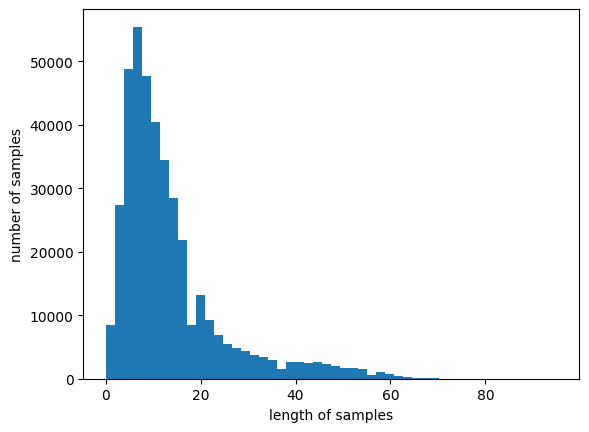

In [52]:
import matplotlib.pyplot as plt
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 전처리한 데이터로 학습한 Word2Vec 모델 생성 
- tokenized_data 데이터 사용 

In [54]:
from gensim.models import Word2Vec

model_kor = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [55]:
# 완성된 임베딩 벡터 크기 확인
print('완성된 임베딩 벡터 크기 확인 :', model_kor.wv.vectors.shape)

완성된 임베딩 벡터 크기 확인 : (24008, 100)


In [56]:
model_kor.wv["최민식"]

array([-0.6603948 ,  0.26338688,  0.2681321 , -0.10701062, -0.05118733,
       -0.47051576,  0.43176034,  0.71355885, -0.12181298,  0.5851425 ,
        0.3214992 , -0.09455473,  0.23726718, -0.27429163, -0.42975387,
       -0.6112761 ,  0.29408047, -0.18129502, -0.44465807, -0.70075214,
        0.41567814,  0.07322472,  0.51562387, -0.05578299, -0.01857315,
        0.5065442 , -0.22953884, -0.00875416, -0.11753407, -0.12749329,
        0.65490615, -0.08816297,  0.55151844,  0.11903962,  0.6924365 ,
       -0.5028924 , -0.46310705,  0.10135062,  0.05604716, -0.8265829 ,
        0.9532888 , -0.59942824,  0.2287039 , -0.22755277,  0.20977798,
        0.14400442, -0.22301891,  0.6354358 ,  0.9342683 , -0.3546552 ,
       -0.04870952, -0.2130079 , -0.26689702,  0.24022749, -0.45778617,
       -0.12176638,  0.5432274 , -0.4533592 ,  0.37537113,  0.36208877,
       -0.21285565,  0.16164717, -0.05200569, -0.13565803, -0.58630544,
        0.19053563, -0.5713672 ,  0.7167518 , -0.74807453, -0.05

In [63]:
model_kor.wv.most_similar("최민식")
model_kor.wv.most_similar("히어로")
model_kor.wv.most_similar("명연기")
print(model_kor.wv.similarity("최민식", "명연기"))
print(model_kor.wv.similarity("최민식", "발연기"))

0.5705279
0.46672532


In [64]:
vocab_list= model_kor.wv.key_to_index

In [65]:
vocab_list
vocab_list["히로인"]
vocab_list.keys()

dict_keys(['.', '영화', '보다', '..', '이', '을', '...', '하다', ',', '없다', '의', '에', '가', '이다', '있다', '좋다', '너무', '?', '도', '다', '정말', '들', '재밌다', '되다', '적', '만', '진짜', '는', '!', '같다', '를', '은', '점', '로', '아니다', '않다', '에서', '만들다', '연기', '나오다', '평점', '것', '최고', '~', '내', '나', '그', '인', '안', '생각', '스토리', '못', '왜', '....', '게', '드라마', '감동', '사람', '1', '한', '보고', '이렇다', '말', '아깝다', '고', '더', '때', '아', 'ㅋㅋ', '배우', '감독', '거', '그냥', '재미있다', '요', '내용', '으로', '재미', '중', '까지', '뭐', '주다', '!!', '재미없다', '자다', '하고', '지루하다', '쓰레기', '가다', '시간', '수', '들다', '네', '과', '모르다', '그렇다', '싶다', '사랑', '작품', '지', '10', '알다', '볼', '다시', '하나', '마지막', '이건', '오다', 'ㅋ', '저', '정도', '2', '완전', '많다', 'ㅋㅋㅋ', '처음', '장면', '주인공', '액션', '이렇게', '차다', 'ㅠㅠ', '나다', '안되다', '걸', '최악', '개', '지금', '3', "'", '이야기', '돈', '하', '임', '별로', '연출', '와', '끝', '넘다', '느낌', '좋아하다', '대', '라', '듯', '명작', '인데', '별', '역시', '그리고', '기', '받다', '난', '많이', '이해', '남다', '^^', 'ㅡㅡ', '면', '라고', '!!!', '괜찮다', '이영화', '좀', '이런', '버리다', '느끼다', '때문', '또', '여자', '서', '이

### txt 파일 데이터 사용

In [66]:
# 학습에 사용할 텍스트 파일 로드
# txt 파일을 gensim 패키지 말뭉치(word2vec가 사용가능한 형태)로 로드
import gensim
sentences = gensim.models.word2vec.Text8Corpus("./data/0307/naver_movie_reviews_tokens.txt")

In [67]:
sentences

In [68]:
# 텍스트 파일에서 읽어온 데이터로 학습한 모델 생성 
from gensim.models.word2vec import Word2Vec
model_naver_txt = Word2Vec(sentences, vector_size=50, window=5, min_count=5, workers=4, sg=0)

In [70]:
model_naver_txt.wv["음악"]
model_naver_txt.wv["명연기"]

array([ 0.20263928,  0.1619186 ,  0.56051046, -0.44743642,  0.5727344 ,
       -0.46919584, -0.01473327, -0.09836437, -0.5574905 , -0.24721642,
        0.31595266, -1.192726  ,  1.0049889 ,  0.07317608, -0.0598549 ,
       -0.8313551 ,  0.42542982, -0.48898536, -0.21633366, -0.45988467,
       -0.0823132 ,  0.34683433, -0.37952086, -1.3522681 ,  0.10026387,
        0.41963878,  0.00909603,  0.06174706,  0.07706513, -0.11270268,
       -0.2261408 ,  0.43807238, -0.23353596, -0.6033886 , -0.15227346,
       -0.60509497,  0.03172344,  0.36495233,  0.5471338 , -0.8131142 ,
        0.37107694, -0.3318094 ,  0.40140426,  0.43931162,  0.35265827,
       -0.69211257, -0.7160254 ,  0.12146415,  0.5981942 ,  0.1453972 ],
      dtype=float32)

In [71]:
model_naver_txt.wv.most_similar(positive=["최민식"], topn=10)

[('김수현', 0.814203143119812),
 ('박중훈', 0.803257942199707),
 ('한석규', 0.8018301129341125),
 ('안성기', 0.7977200150489807),
 ('정재영', 0.7968029975891113),
 ('혼신', 0.7897970676422119),
 ('전도연', 0.787277102470398),
 ('김명민', 0.785895824432373),
 ('김창완', 0.7858883142471313),
 ('양동근', 0.7838810682296753)]